In [1]:
#Pricer une Option avec la formule de Black&Scholes

In [11]:
import yfinance as yf
import datetime as dt
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt

In [3]:
#Stock
start= "2024-05-01"
end= dt.datetime.now()
stock = yf.download("AAPL", start, end)
stock_adj = stock["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [7]:
#Paramètres
K = 1000
S = 1000
T = 1
type = "Put"
r = yf.download("^TNX", start, end)["Adj Close"].iloc[-1]
q = yf.Ticker("AAPL").info.get("dividendYield")
sigma = 0.285
print(r,q)

[*********************100%%**********************]  1 of 1 completed

4.638000011444092 0.0045


In [5]:
#Find the implied volatility ?

In [8]:
#Formule de Black&Scholes
#Aller dans Options Yahoo Finance ou sur internet
def black_scholes(S, K, T, r, q, sigma, type):
    d1 = (np.log(S/K) + (r/100 - q + (sigma**2)/2))*T/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if type == "Call":
        return S*np.exp(-q*T)*norm.cdf(d1)-K*np.exp(-r*T/100)*norm.cdf(d2)
    if type == "Put":
        return K*np.exp(-r*T/100)*norm.cdf(-d2)-S*np.exp(-q*T)*norm.cdf(-d1)       
black_scholes(S,K,T,r,q,sigma,type)

91.25983900113698

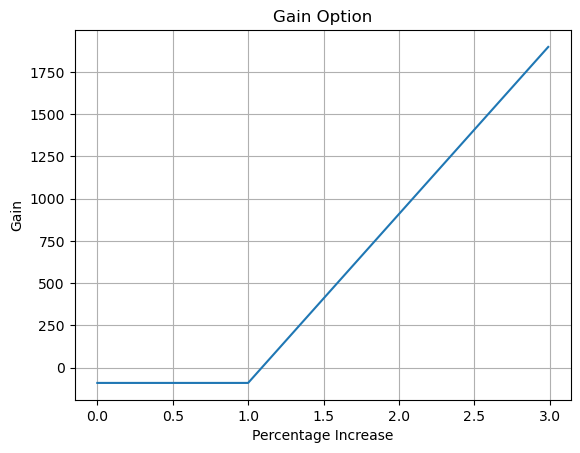

In [20]:
#Tracé Value portfolio Call
C = black_scholes(S,K,T,r,q,sigma,type)
A = np.arange(0,3,0.01)
G = [ (i*K - K - C if i > 1 else -C) for i in A]
plt.title('Gain Option')
plt.plot(A,G)
plt.xlabel('Percentage Increase')
plt.ylabel('Gain')
plt.grid(True)
plt.show()

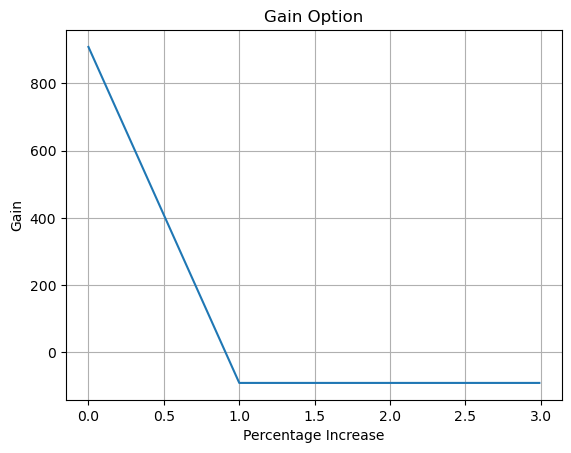

In [28]:
#Tracé Value portfolio Put
C = black_scholes(S,K,T,r,q,sigma,"Put")
A = np.arange(0,3,0.01) #S/K
G = [ (K -i*K - C if i < 1 else -C) for i in A]
plt.title('Gain Option')
plt.plot(A,G)
plt.xlabel('Percentage Increase')
plt.ylabel('Gain')
plt.grid(True)
plt.show()